Customer Loyalty Analysis involves evaluating customer behaviors and preferences to understand their commitment to a brand or business. This analysis helps organizations identify loyal customers, assess factors influencing loyalty, and develop strategies to enhance customer retention.

In [90]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interp

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# Classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Evaluation metrics
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    roc_curve, 
    roc_auc_score
)

# Dimensionality reduction
from sklearn.decomposition import PCA


In [63]:
# Read the CSV file
df = pd.read_csv('customer_data.csv')

In [64]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       9529 non-null   float64
 1   income                    9497 non-null   float64
 2   education_years           9524 non-null   float64
 3   gender                    10000 non-null  object 
 4   total_purchases           9502 non-null   float64
 5   average_purchase_value    9496 non-null   float64
 6   days_since_last_purchase  9509 non-null   float64
 7   customer_service_calls    9461 non-null   float64
 8   website_visits            9489 non-null   float64
 9   app_usage_frequency       9516 non-null   float64
 10  total_revenue             9542 non-null   float64
 11  discount_usage_rate       9541 non-null   float64
 12  membership_duration       9500 non-null   float64
 13  seasonal_factor           9521 non-null   float6

In [65]:
# Display first few rows
print("\nFirst 5 rows of data:")
df.head()


First 5 rows of data:


age        income  education_years  gender  total_purchases  \
0  66.712445 -4.933409e+05        19.191318  Female        34.904272   
1  50.814836  1.011861e+05         6.713995  Female       109.195765   
2  50.109721 -1.323195e+06        10.467924  Female       158.118243   
3  87.068867 -8.144721e+05         8.772307    Male        85.515041   
4  52.082650  2.054681e+05        13.954640    Male       124.903425   

   average_purchase_value  days_since_last_purchase  customer_service_calls  \
0             5365.186932                 27.837848                1.666290   
1                     NaN                 38.335850                0.040676   
2             1249.350090                 34.898891                3.138934   
3             1548.510621                 20.038007                3.991731   
4             2956.595965                 -1.925506                4.393237   

   website_visits  app_usage_frequency  total_revenue  discount_usage_rate  \
0        9.407810             9.362235   84392.134896             0.574842   
1       22.923219            -0.730162   -9643.165784             0.750969   
2        9.616608             9.902767   36269.382482                  NaN   
3       16.783652            -0.039560   41398.381276             0.527003   
4       20.427197             6.734478   48649.140304             0.023696   

   membership_duration  seasonal_factor  purchase_efficiency  \
0            26.619463        -0.999026           336.888948   
1                  NaN         7.617746         11167.472067   
2            33.927063        -5.399984          -196.191305   
3                  NaN        -4.264105         -1468.331754   
4                  NaN         6.764982          5475.037273   

   engagement_score  loyalty_score loyalty_level  
0         33.329282      85.214821          High  
1         28.144078     111.600487          High  
2         24.974082      61.762406          High  
3         34.475897      57.358537          High  
4         15.850141      97.294269          High

In [66]:
# Get statistical summary
print("\nStatistical Summary:")
df.describe()


Statistical Summary:


age        income  education_years  total_purchases  \
count  9529.000000  9.497000e+03      9524.000000      9502.000000   
mean     43.928192  3.114505e+05        14.618909        90.474040   
std      22.314358  1.164858e+06         5.017456        47.123893   
min     -32.021965 -3.296326e+06        -2.585140       -46.987543   
25%      28.345255 -2.960652e+05        11.017458        56.434052   
50%      43.155533  1.972880e+05        14.611996        85.196162   
75%      59.218010  7.557483e+05        18.094083       120.061656   
max     123.210840  3.040568e+07        33.123762       311.535063   

       average_purchase_value  days_since_last_purchase  \
count             9496.000000               9509.000000   
mean              2077.798905                 36.789937   
std               1692.312248                 50.677905   
min              -3251.837921               -110.967943   
25%                895.166631                  2.979471   
50%               1948.492441                 31.222845   
75%               3117.123720                 63.693070   
max               9129.272121                457.914465   

       customer_service_calls  website_visits  app_usage_frequency  \
count             9461.000000     9489.000000          9516.000000   
mean                 2.416830       12.194852            10.334159   
std                  2.179976        6.635977             7.801885   
min                 -4.577225      -10.701829           -17.570893   
25%                  0.920031        7.448484             4.961029   
50%                  2.302653       12.024939            10.131728   
75%                  3.765864       16.772078            15.547082   
max                 12.224667       37.646410            44.009106   

       total_revenue  discount_usage_rate  membership_duration  \
count    9542.000000          9541.000000          9500.000000   
mean    31253.160072             0.453208            25.499988   
std     23014.047209             0.356247            21.866451   
min    -47882.868176            -0.747477           -39.105830   
25%     15517.112551             0.193482            10.411428   
50%     28457.599819             0.446103            24.030281   
75%     44517.188297             0.705733            39.073107   
max    142652.552820             1.683415           126.456761   

       seasonal_factor  purchase_efficiency  engagement_score  loyalty_score  
count      9521.000000          9459.000000       9495.000000   10000.000000  
mean          0.330825           572.765418         22.710950      59.322846  
std          12.813634          1584.989398         12.920945      30.929997  
min         -43.426355         -3647.227117        -18.009704     -54.943591  
25%          -8.966604          -374.541204         13.562008      37.480954  
50%           0.523308           399.486259         22.214199      57.338577  
75%           9.330693          1240.079453         31.431513      78.017606  
max          41.692369         19657.486330         74.953396     199.701876

In [67]:
# Check for missing values
print("\nMissing Values Count:")
df.isnull().sum()


Missing Values Count:


age                         471
income                      503
education_years             476
gender                        0
total_purchases             498
average_purchase_value      504
days_since_last_purchase    491
customer_service_calls      539
website_visits              511
app_usage_frequency         484
total_revenue               458
discount_usage_rate         459
membership_duration         500
seasonal_factor             479
purchase_efficiency         541
engagement_score            505
loyalty_score                 0
loyalty_level                 0
dtype: int64

In [69]:
df['loyalty_level'].value_counts()

High    5772
Low     4228
Name: loyalty_level, dtype: int64

In [70]:
df['loyalty_level'].unique()

array(['High', 'Low'], dtype=object)

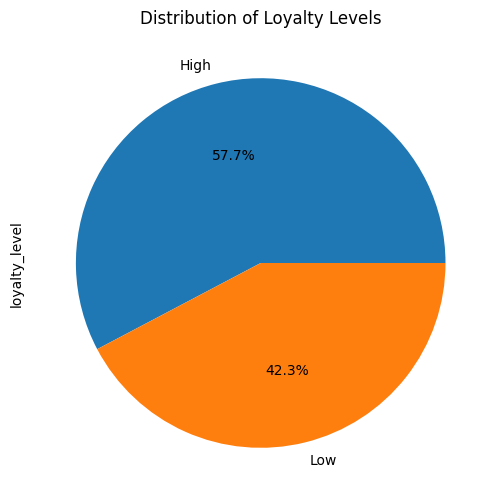

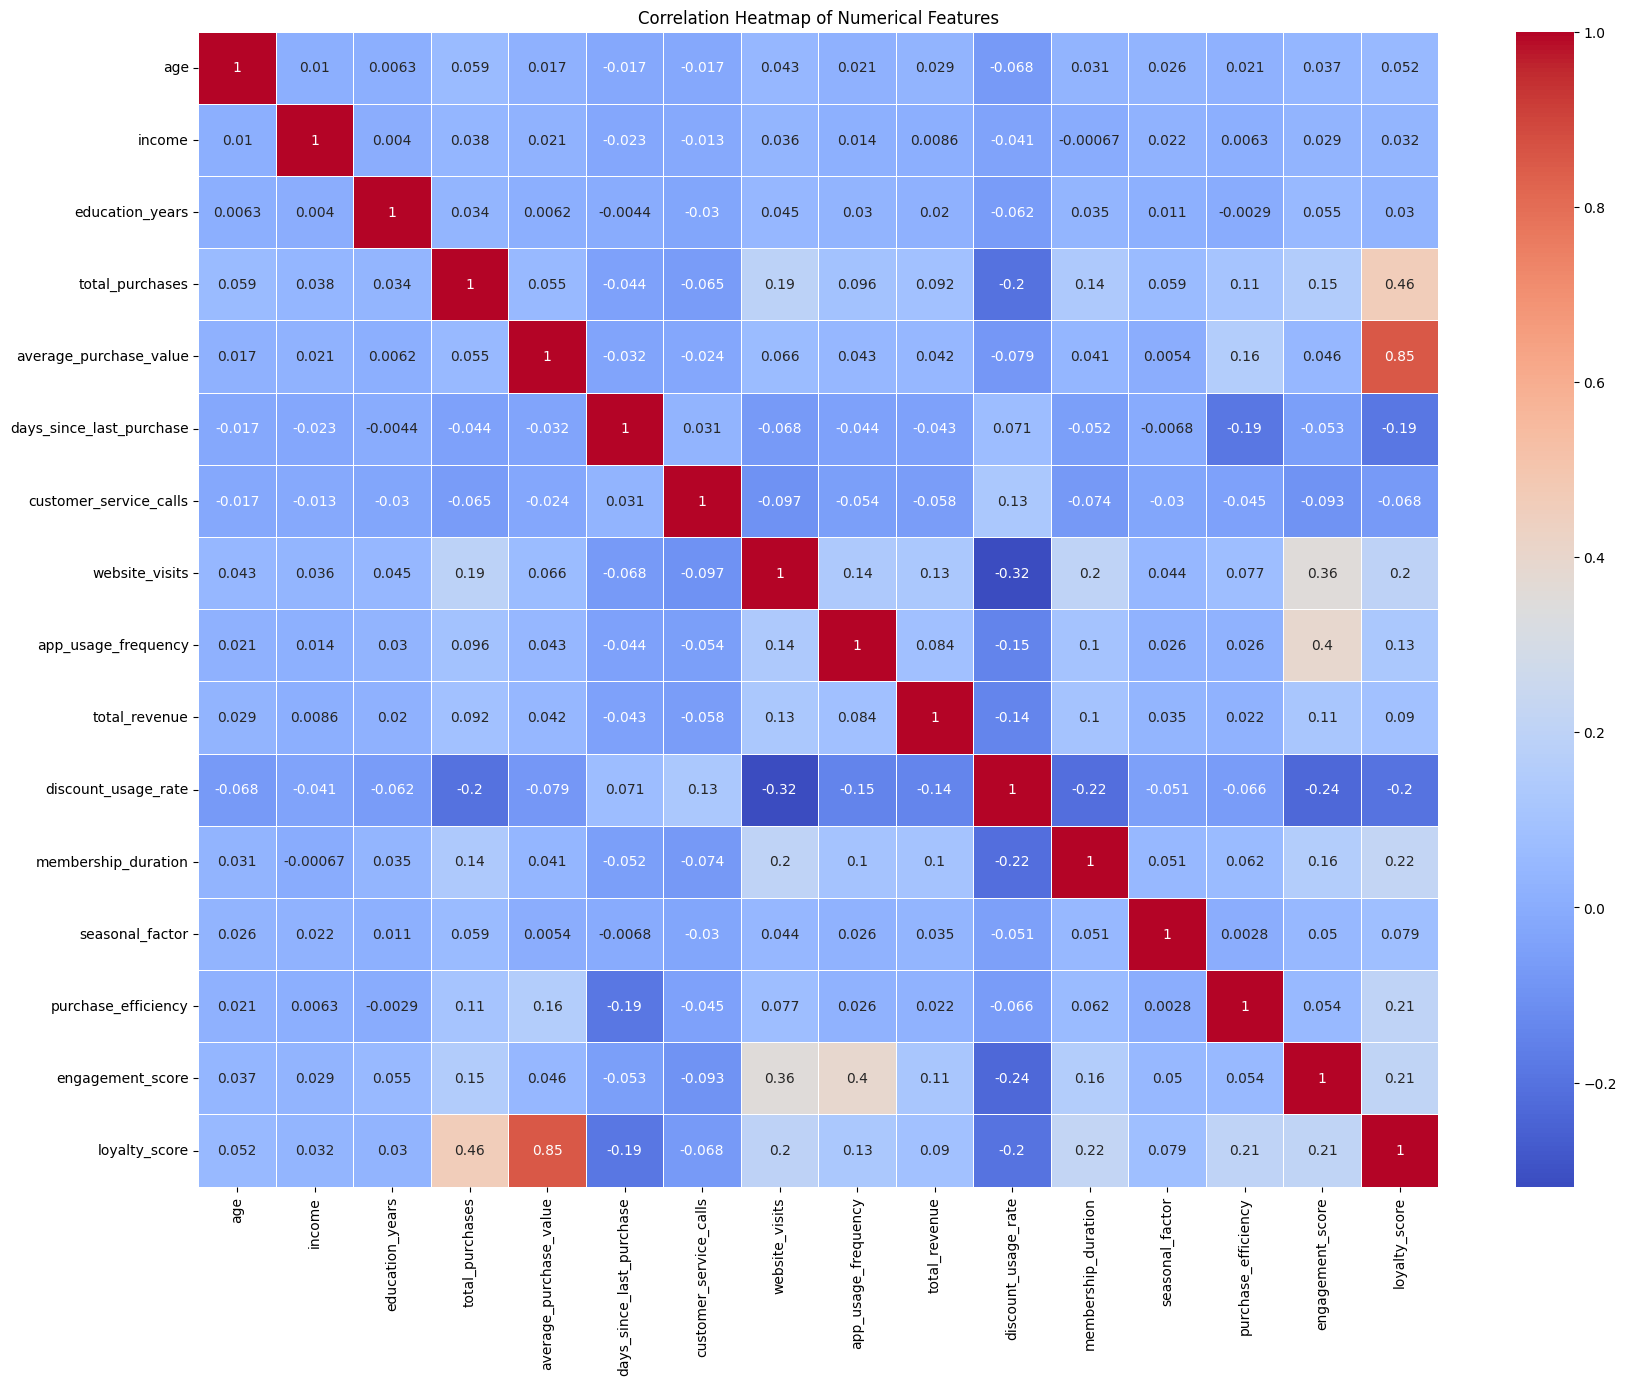

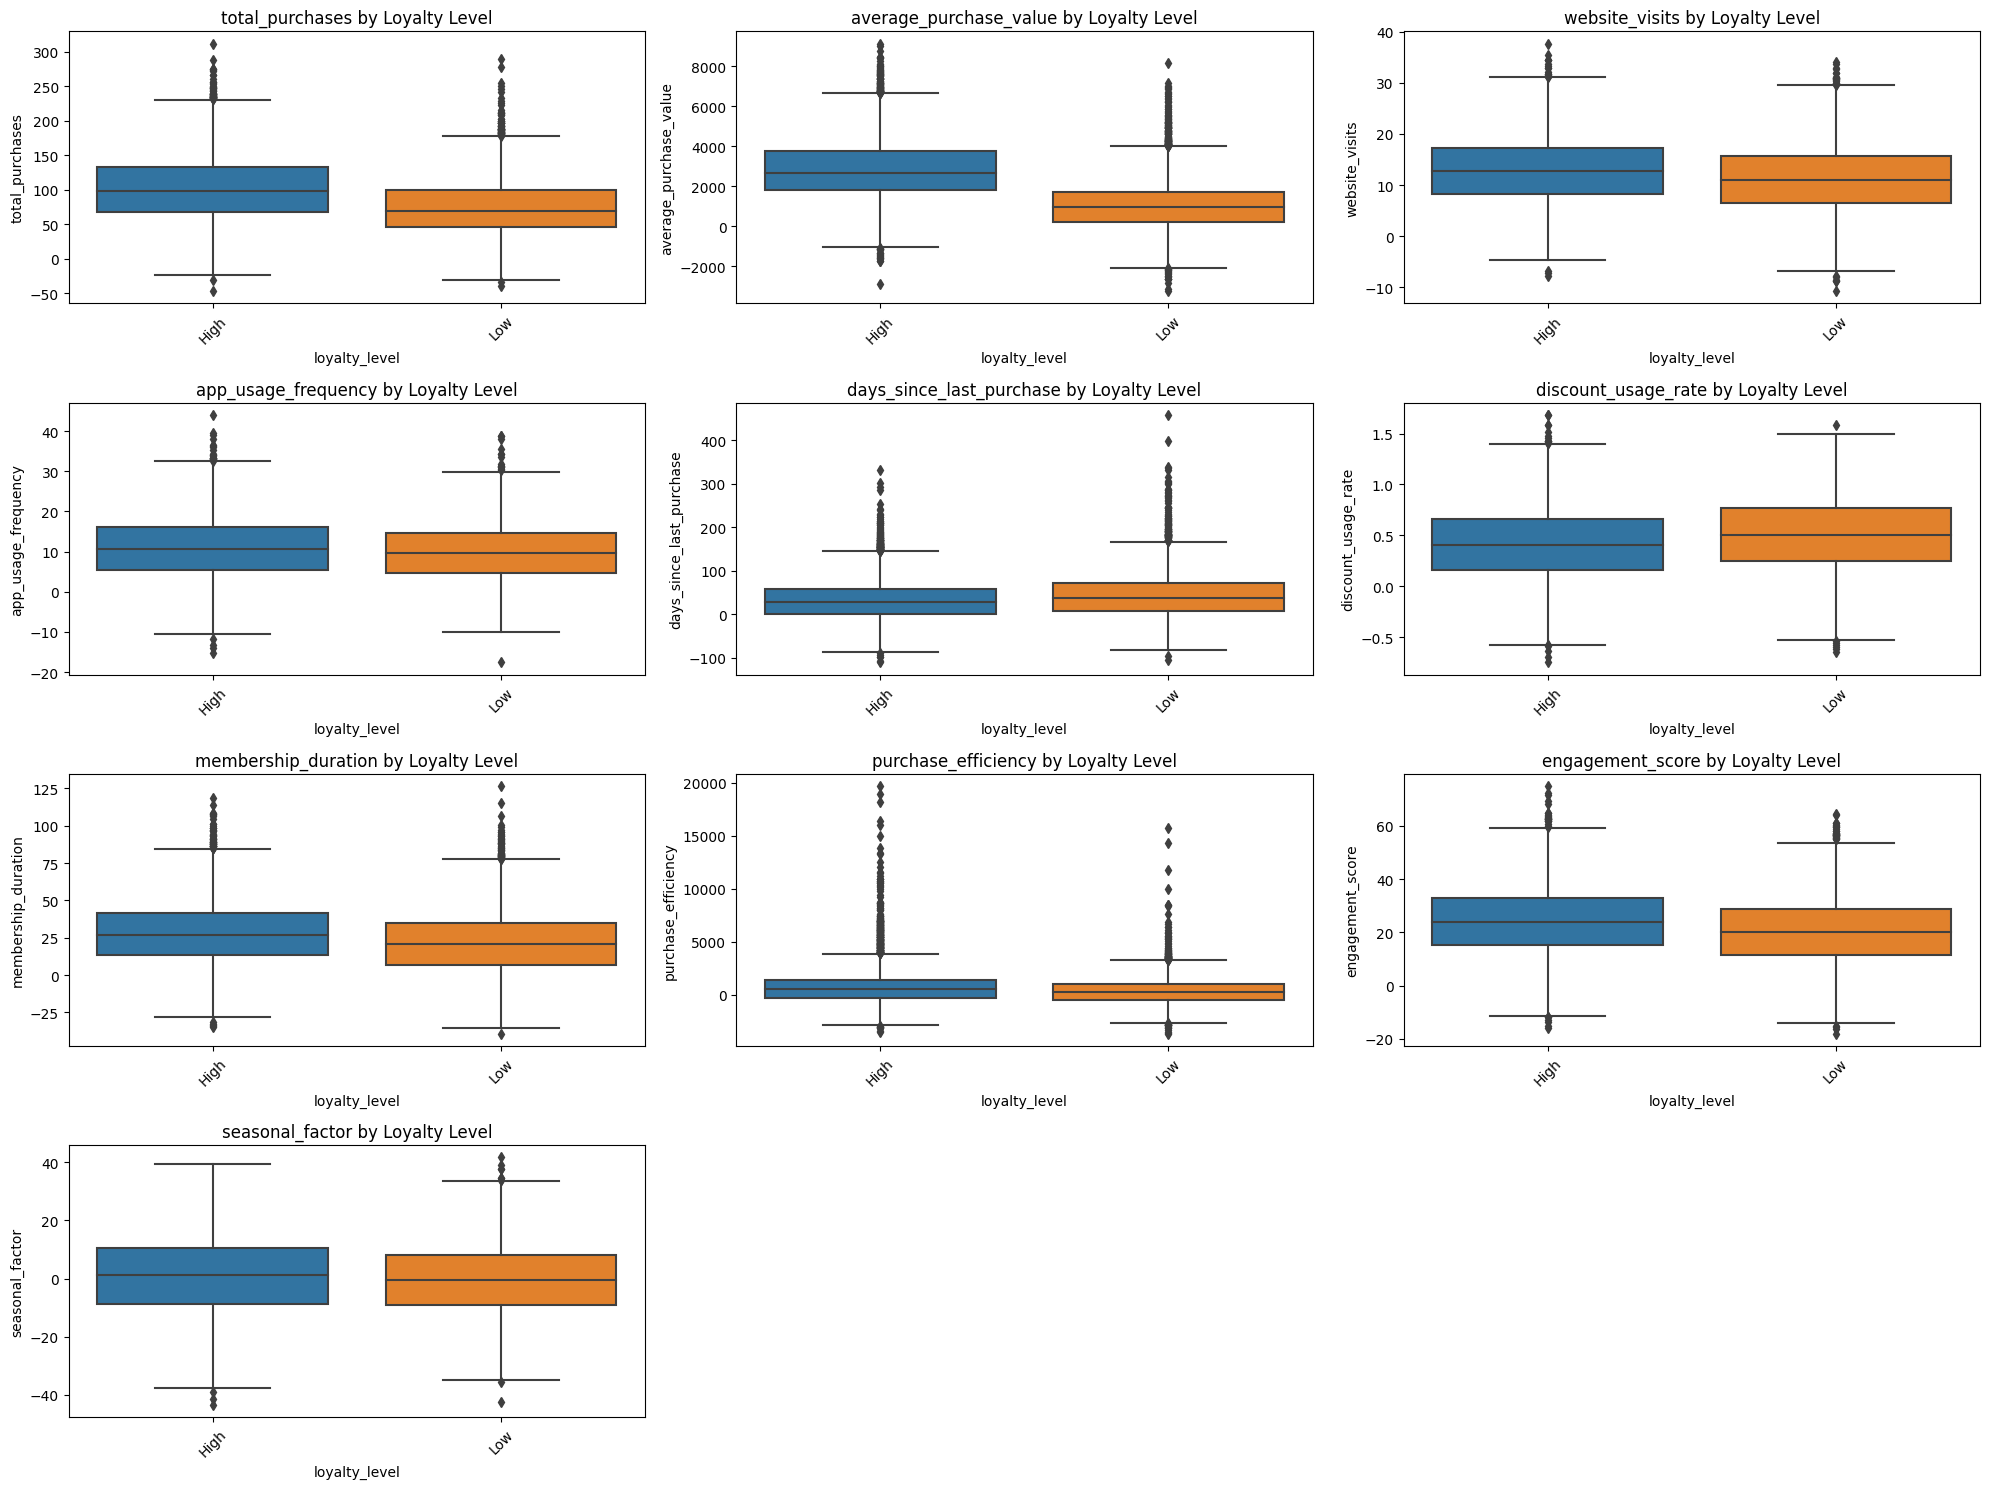

In [71]:
def perform_exploratory_data_analysis(customer_data):
    # Categorical Feature Analysis
    plt.figure(figsize=(12, 6))
    customer_data['loyalty_level'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Distribution of Loyalty Levels')
    plt.show()
    
    # Bivariate Analysis
    plt.figure(figsize=(20, 15))
    
    # Correlation Heatmap
    correlation_matrix = customer_data.select_dtypes(include=[np.number]).corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap of Numerical Features')
    plt.show()
    
    # Box plots for loyalty levels
    plt.figure(figsize=(20, 15))
    features_to_plot = [
        'total_purchases',
        'average_purchase_value',
        'website_visits',
        'app_usage_frequency',
        'days_since_last_purchase',
        'discount_usage_rate',
        'membership_duration',
        'purchase_efficiency',
        'engagement_score',
        'seasonal_factor'
    ]
    
    # Create a 4x3 subplot grid to accommodate all features
    for i, feature in enumerate(features_to_plot, 1):
        plt.subplot(4, 3, i)
        sns.boxplot(x='loyalty_level', y=feature, data=customer_data)
        plt.title(f'{feature} by Loyalty Level')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Perform EDA
perform_exploratory_data_analysis(df)


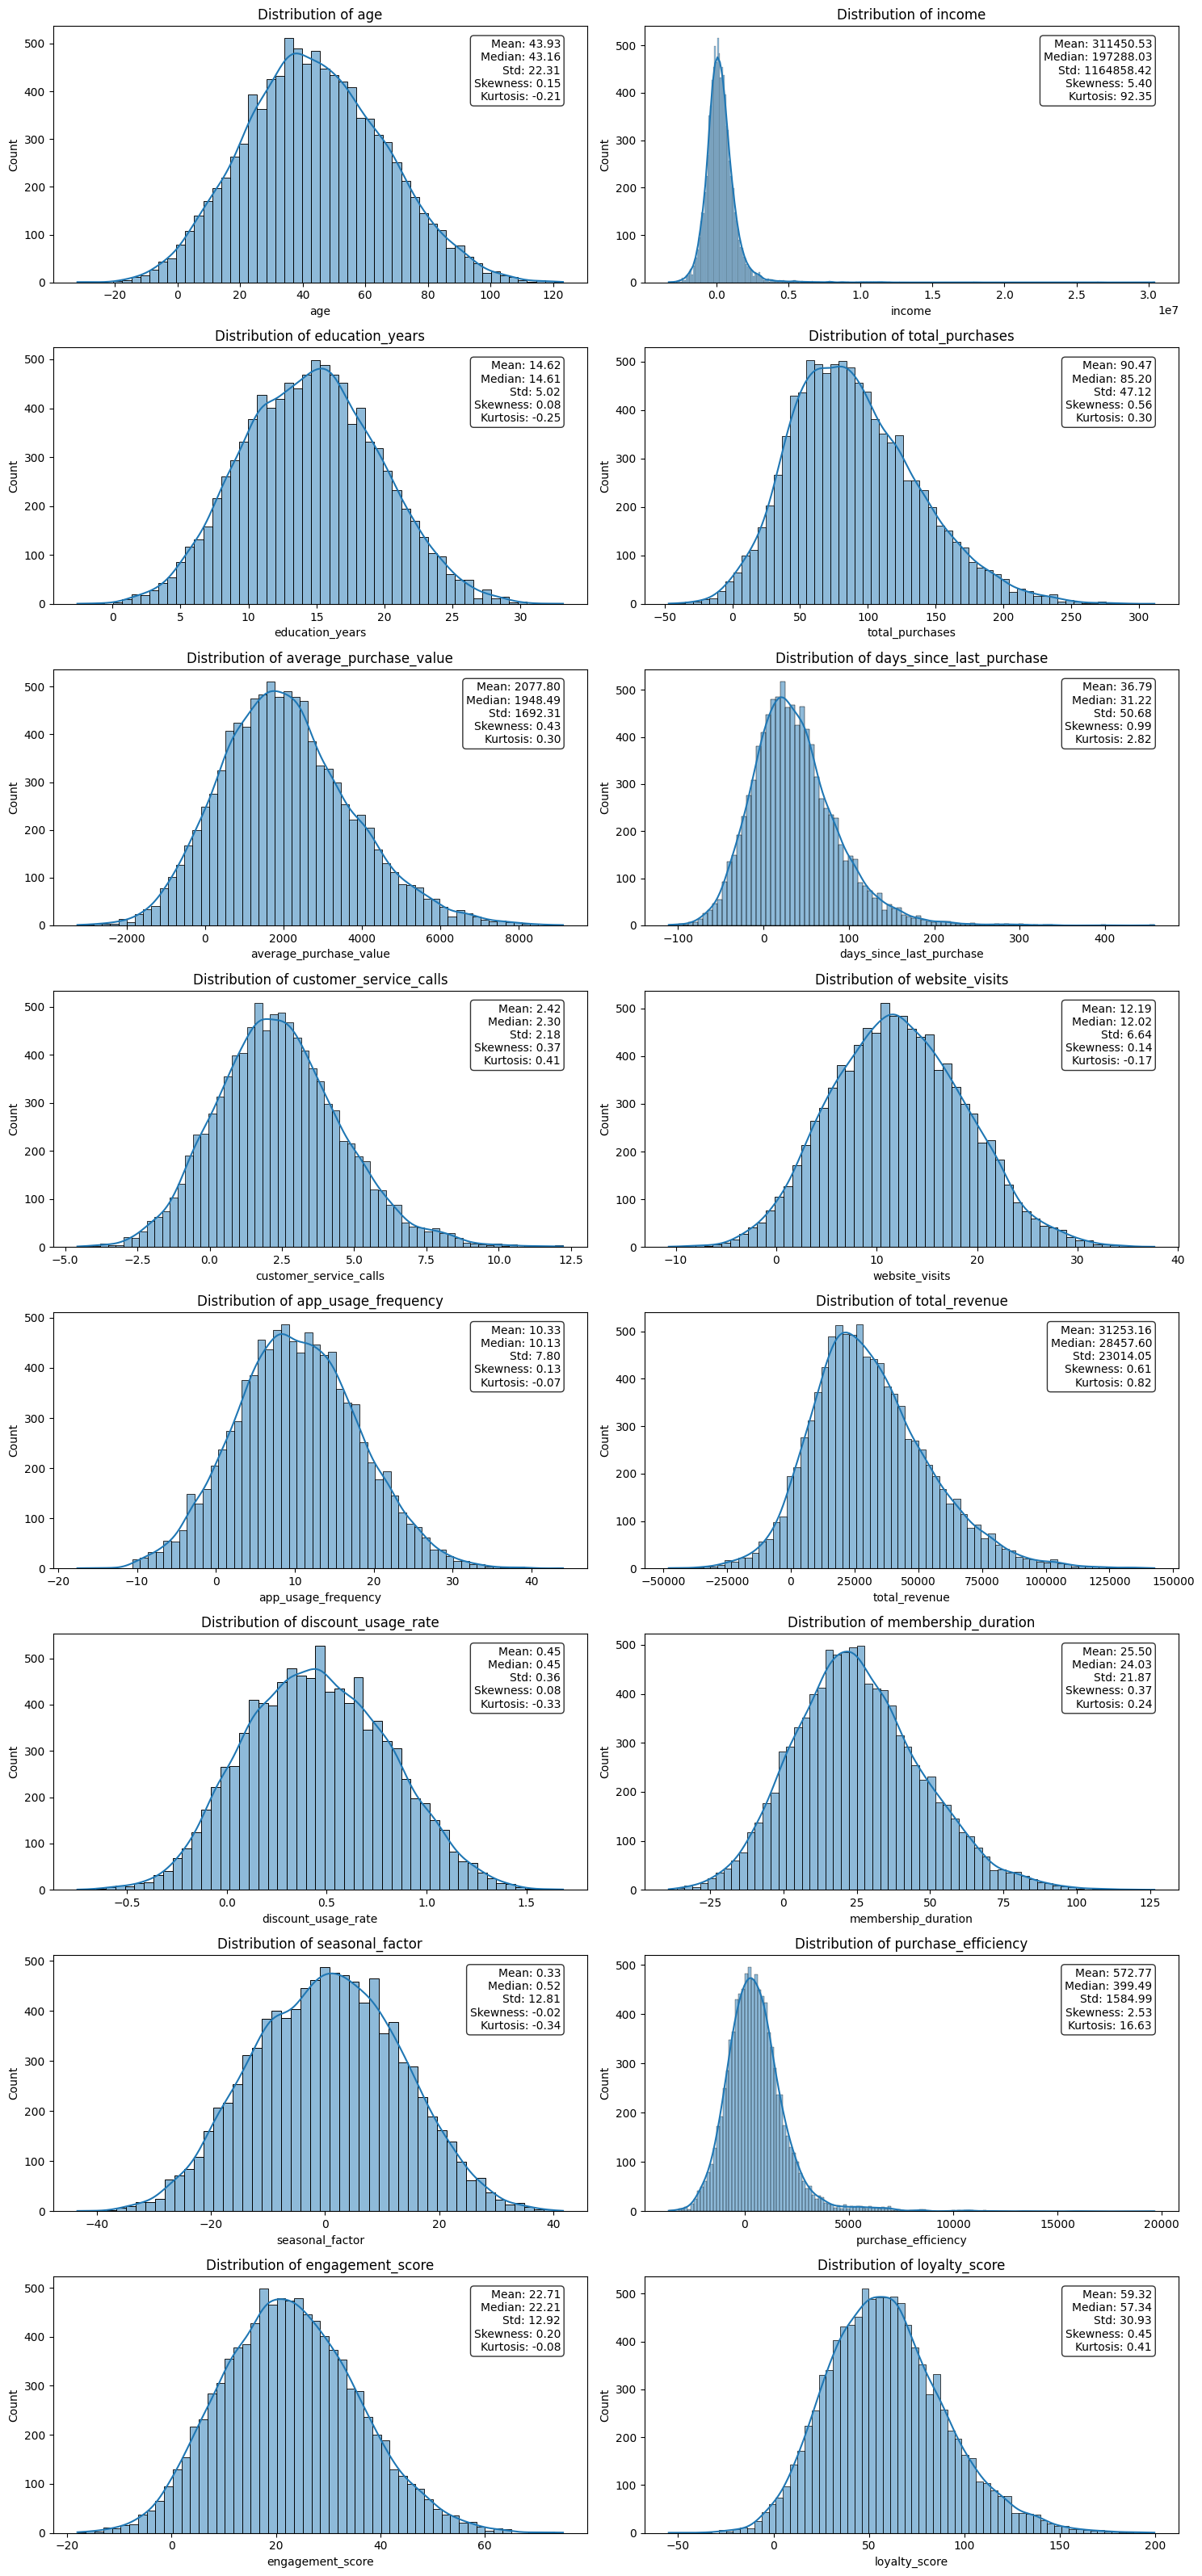

In [72]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(nrows=(len(numerical_cols)+1)//2, ncols=2, figsize=(15, 4*((len(numerical_cols)+1)//2)))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    # Create histogram with KDE
    sns.histplot(data=df, x=col, ax=axes[idx], kde=True)
    
    # Calculate descriptive statistics
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()
    skew_val = df[col].skew()
    kurt_val = df[col].kurtosis()
    
    # Add statistics text box
    stats_text = f'Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nStd: {std_val:.2f}\nSkewness: {skew_val:.2f}\nKurtosis: {kurt_val:.2f}'
    axes[idx].text(0.95, 0.95, stats_text,
                  transform=axes[idx].transAxes,
                  verticalalignment='top',
                  horizontalalignment='right',
                  bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    axes[idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


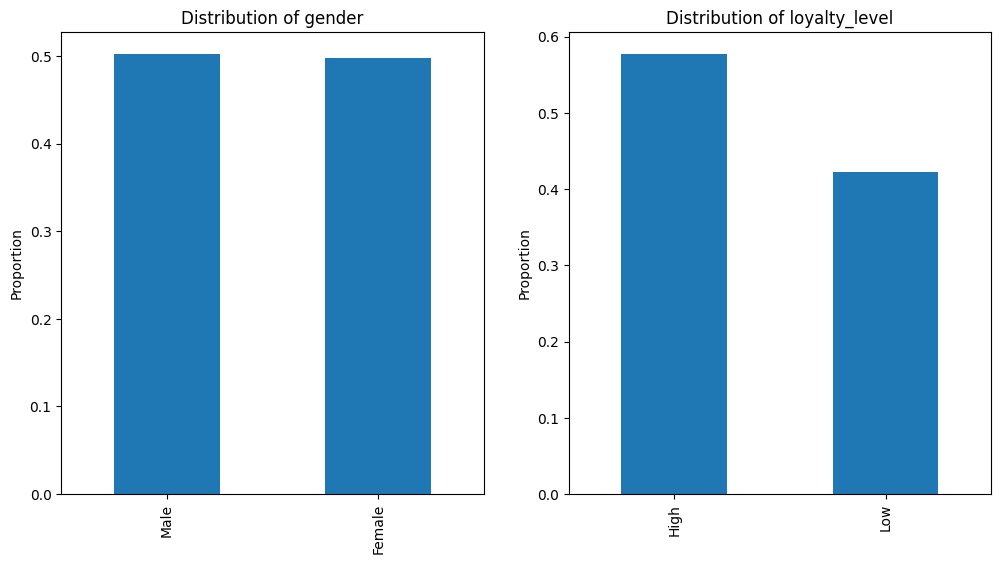

In [73]:
# Categorical Features Analysis
categorical_features = ['gender', 'loyalty_level']
    
plt.figure(figsize=(12, 6))
for i, feature in enumerate(categorical_features, 1):
        plt.subplot(1, 2, i)
        df[feature].value_counts(normalize=True).plot(kind='bar')
        plt.title(f'Distribution of {feature}')
        plt.ylabel('Proportion')

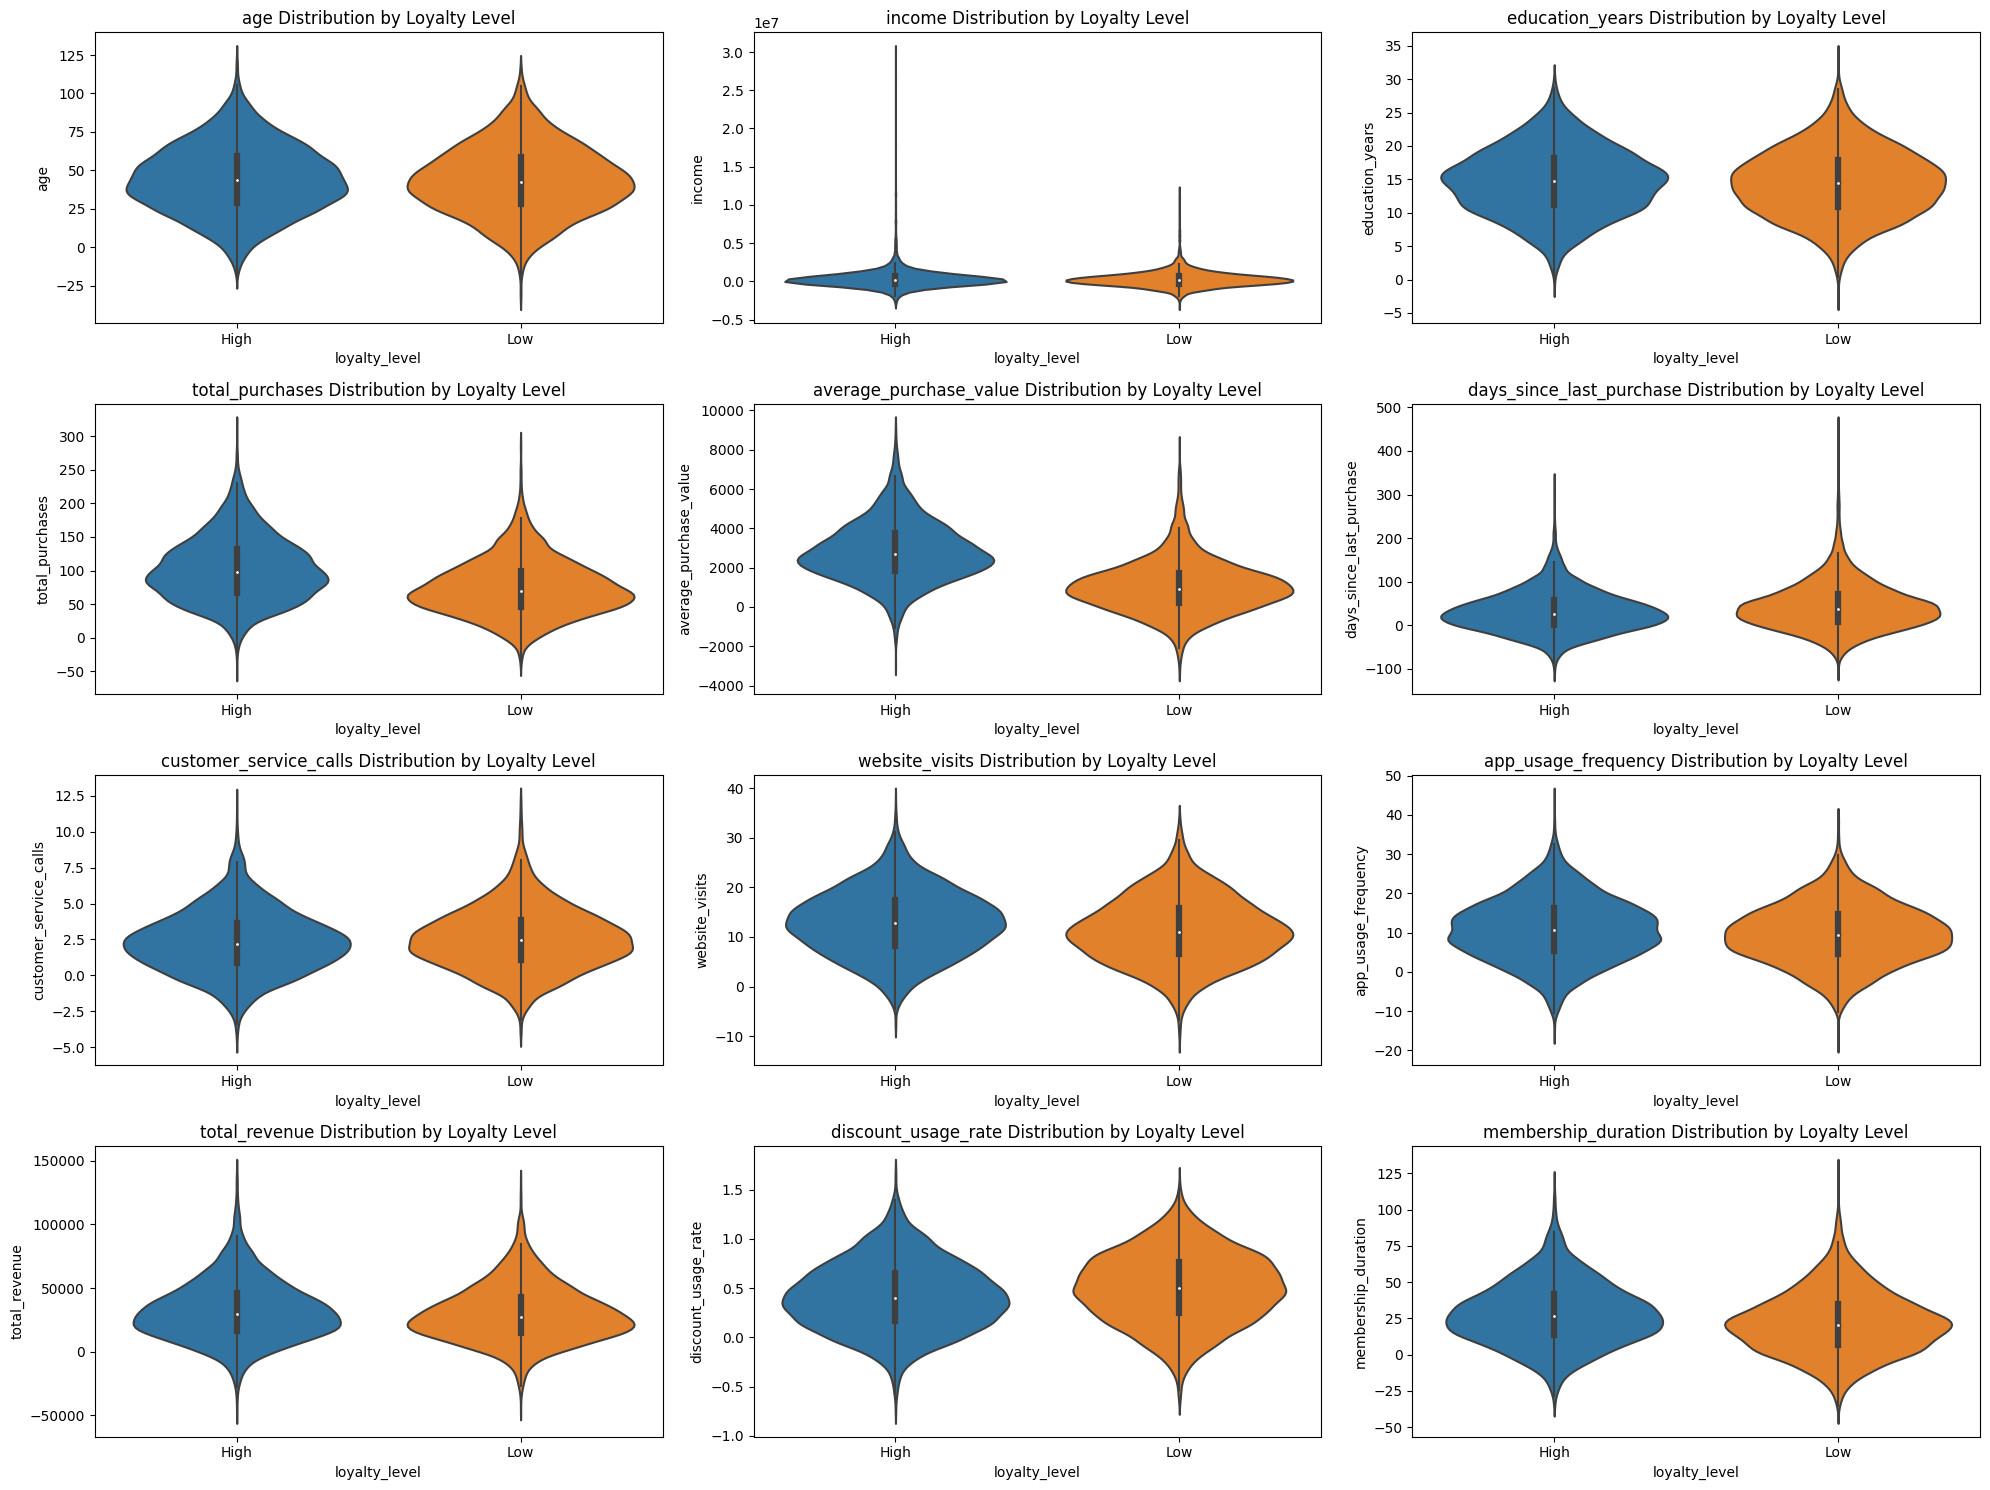

In [74]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_cols[:12], 1):
        plt.subplot(4, 3, i)
        sns.violinplot(data=df, x='loyalty_level', y=feature)
        plt.title(f'{feature} Distribution by Loyalty Level')
plt.tight_layout()

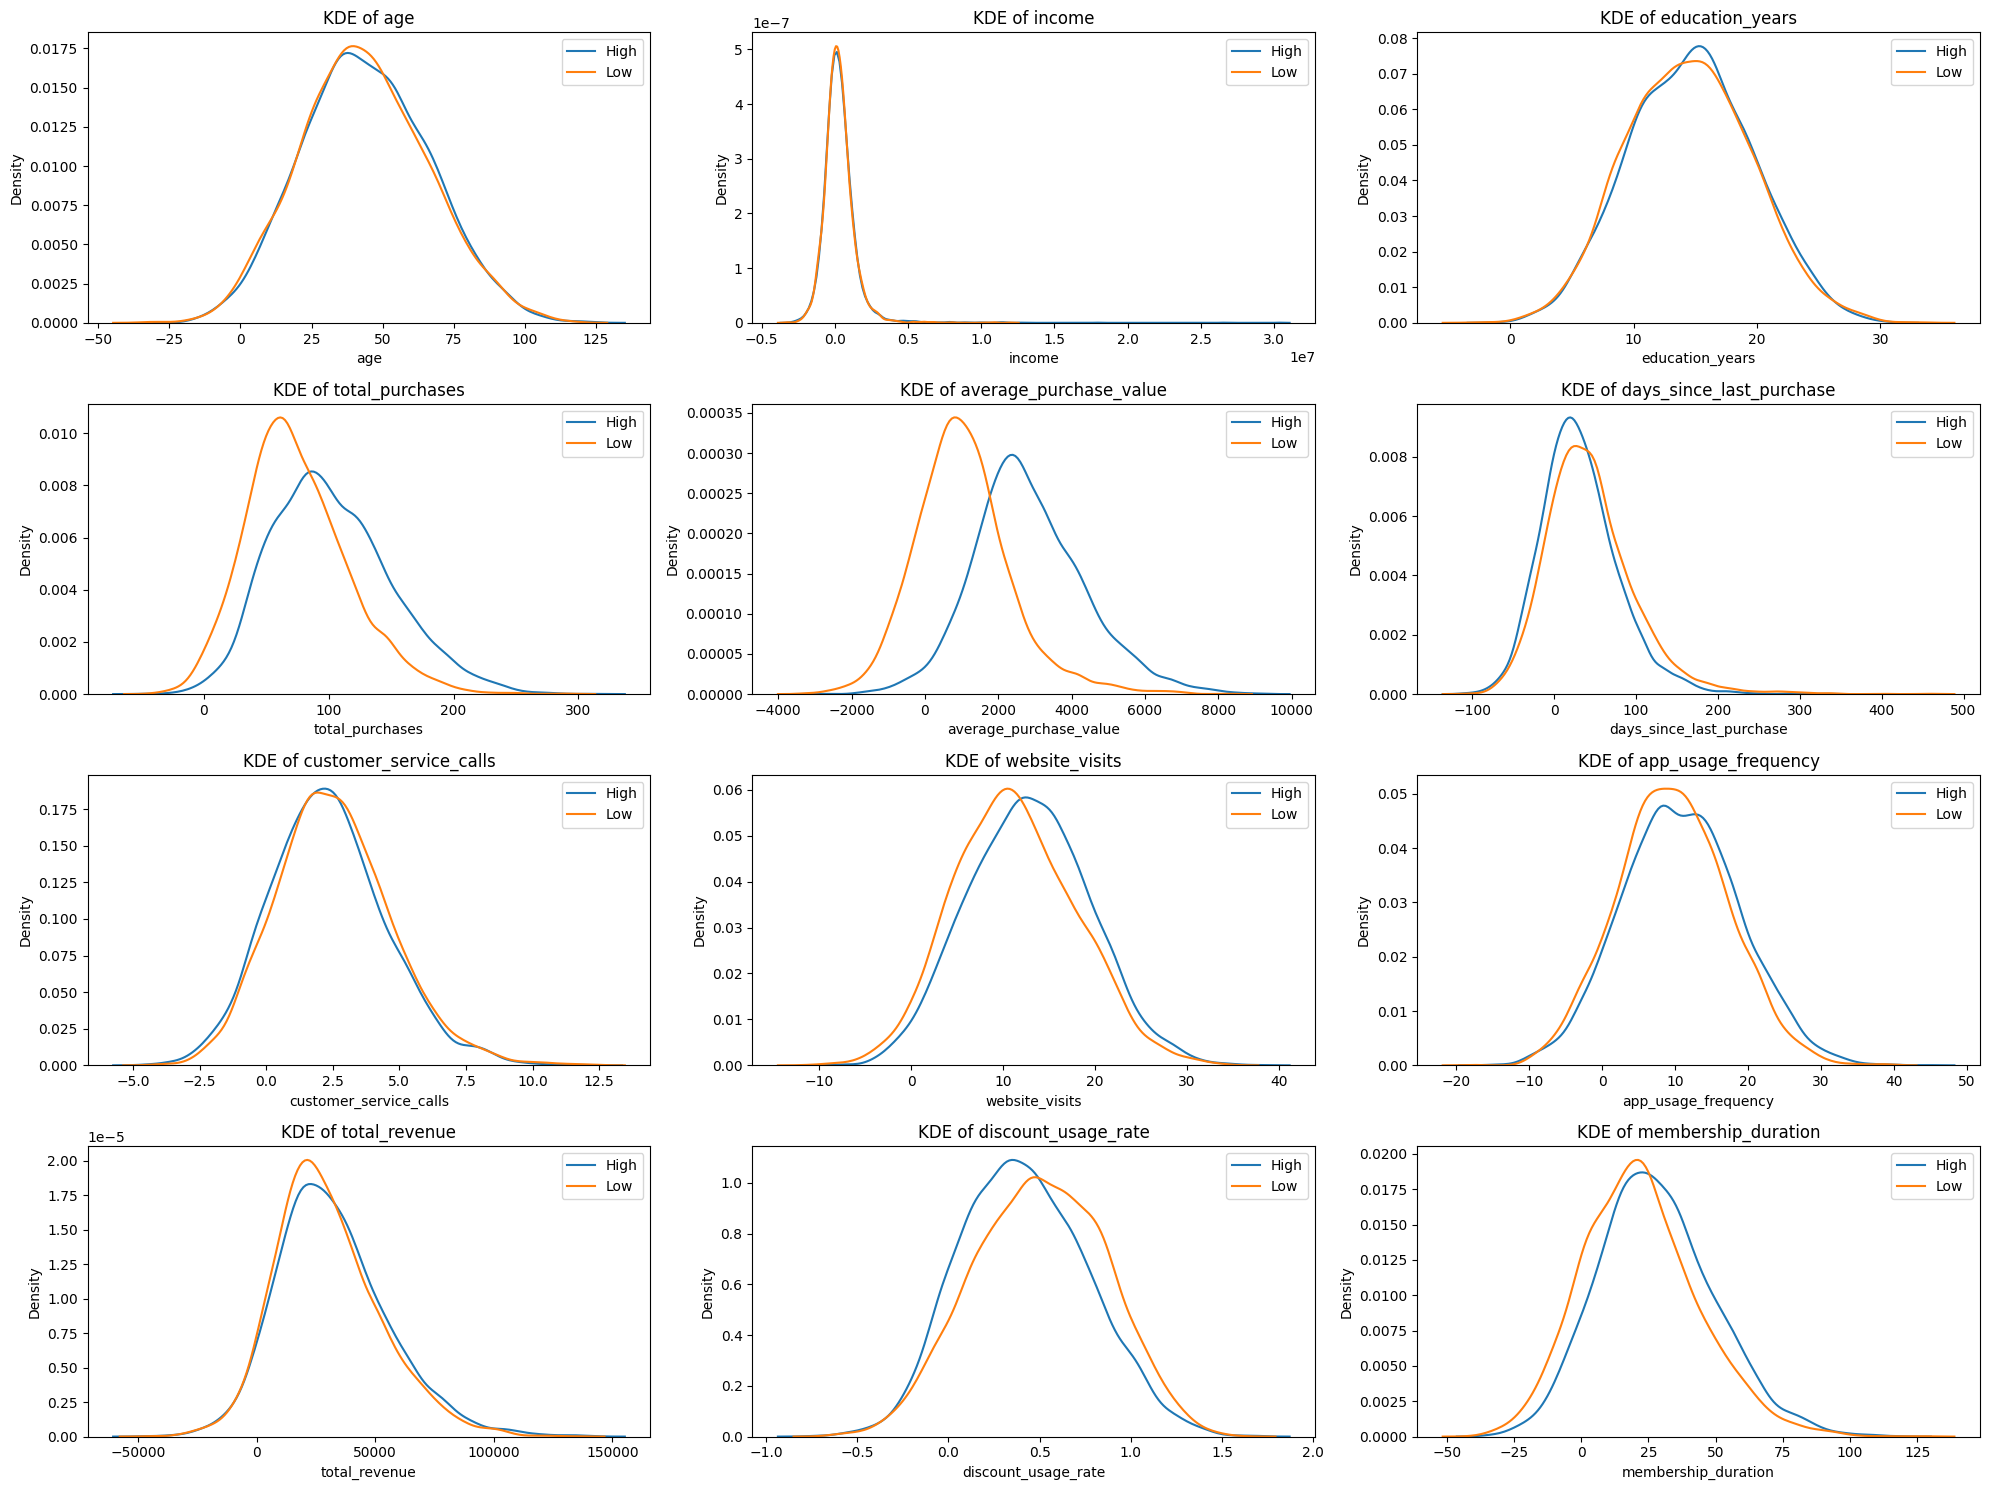

In [75]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_cols[:12], 1):
        plt.subplot(4, 3, i)
        for loyalty in df['loyalty_level'].unique():
            sns.kdeplot(data=df[df['loyalty_level'] == loyalty], x=feature, label=loyalty)
        plt.title(f'KDE of {feature}')
        plt.legend()
plt.tight_layout()

In [76]:
import plotly.express as px

# Select features for parallel coordinates
parallel_features = [
    'age', 'income', 'total_purchases',
    'average_purchase_value', 'website_visits',
    'total_revenue'
]

# Normalize the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[parallel_features]),
                        columns=parallel_features)

# Add the loyalty numeric column to df_scaled
df_scaled['loyalty_numeric'] = df['loyalty_level'].map({'Low': 0, 'High': 1})

# Create parallel coordinates plot with numeric color values
fig = px.parallel_coordinates(
    df_scaled,
    dimensions=parallel_features,
    color='loyalty_numeric',
    title='Customer Characteristics Parallel Coordinates',
    color_continuous_scale=px.colors.sequential.Viridis
)

fig.show()


c:\Users\chandan\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



<Figure size 2000x2000 with 0 Axes>

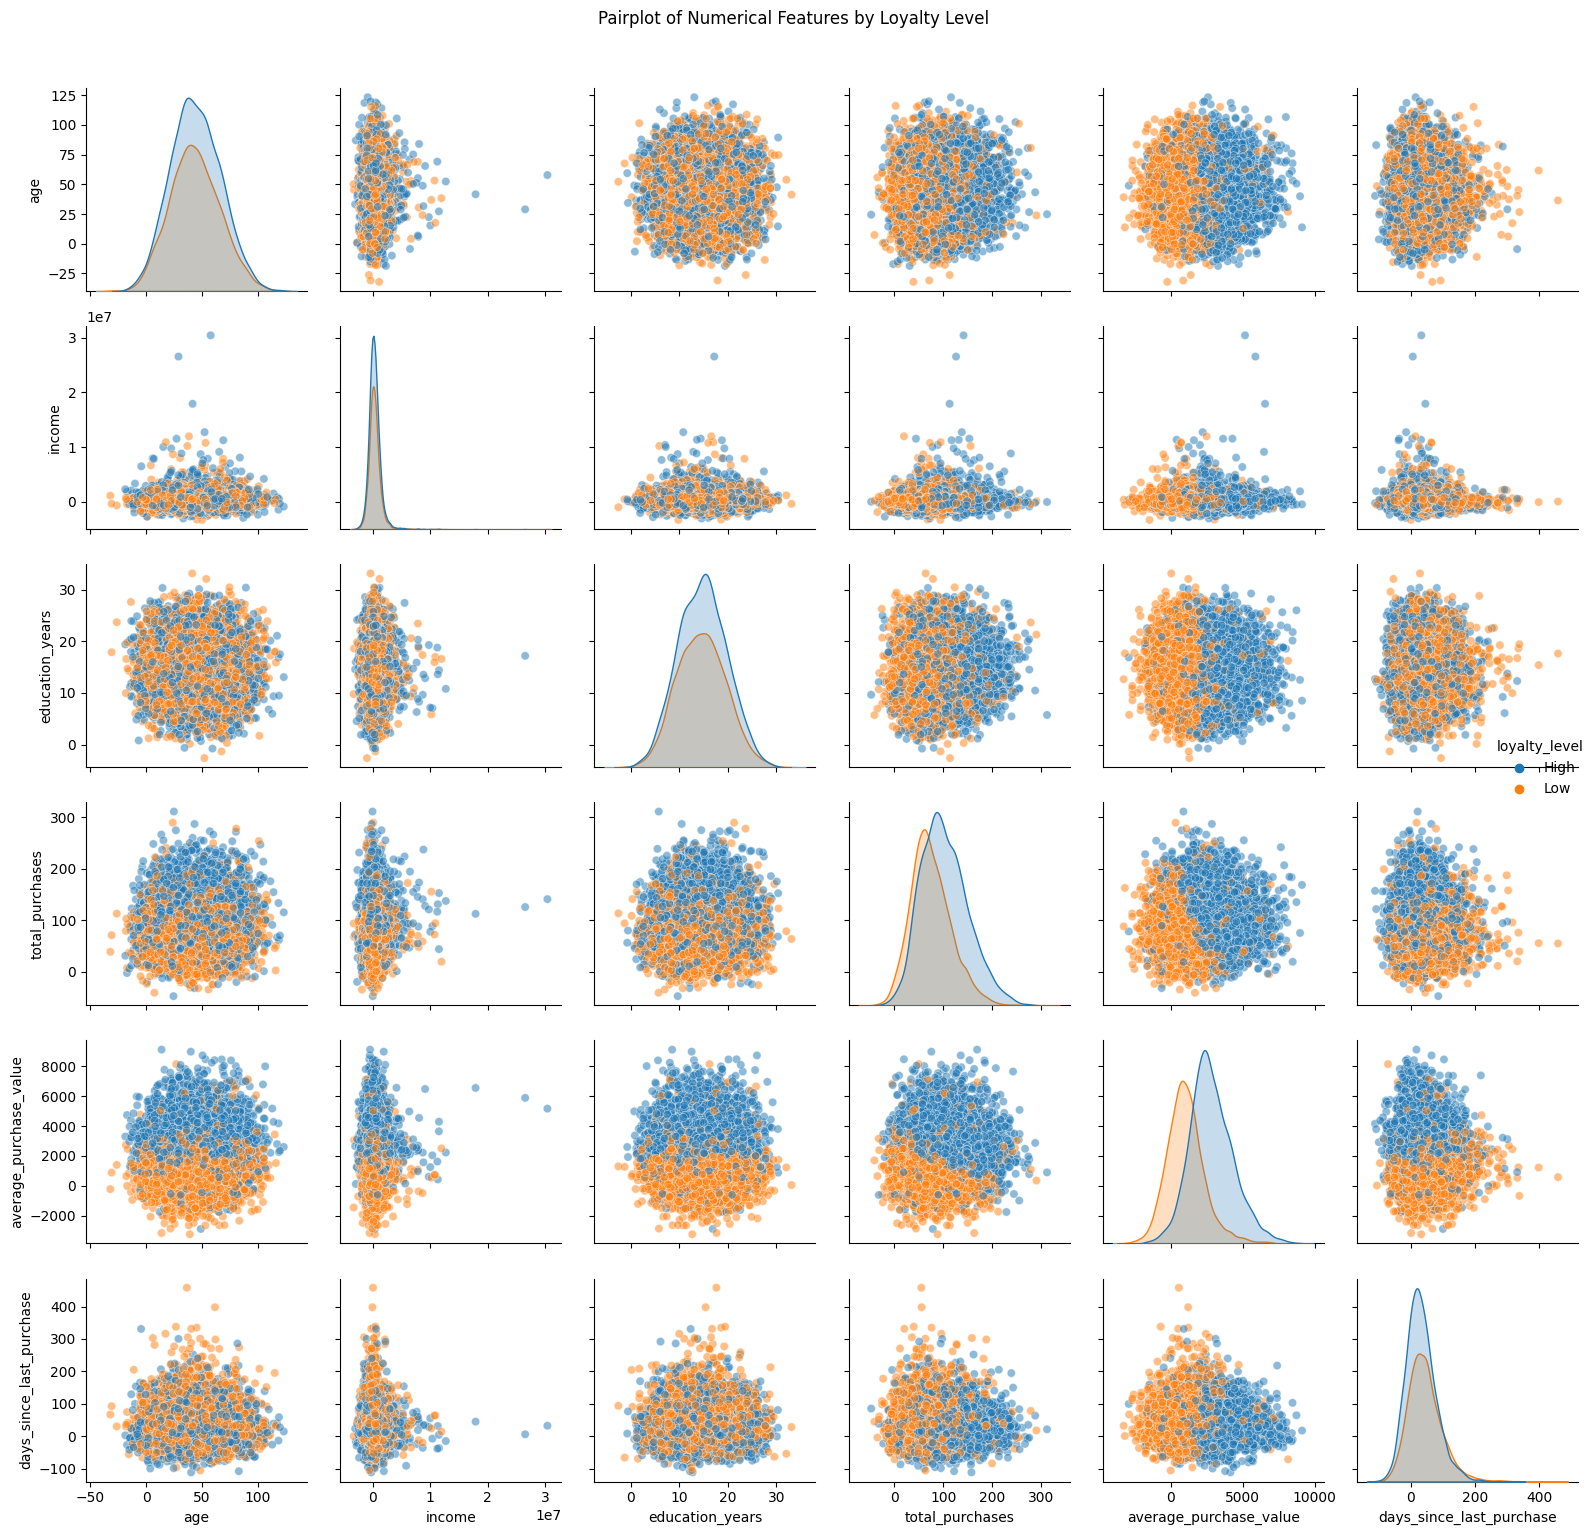

In [77]:
# Create the pairplot
plt.figure(figsize=(20, 20))
selected_cols = [col for col in numerical_cols[:6] if col in df.columns] + ['loyalty_level']
g = sns.pairplot(df[selected_cols], hue='loyalty_level', plot_kws={'alpha': 0.5})
g.fig.suptitle('Pairplot of Numerical Features by Loyalty Level', y=1.02)
plt.tight_layout()
plt.show()

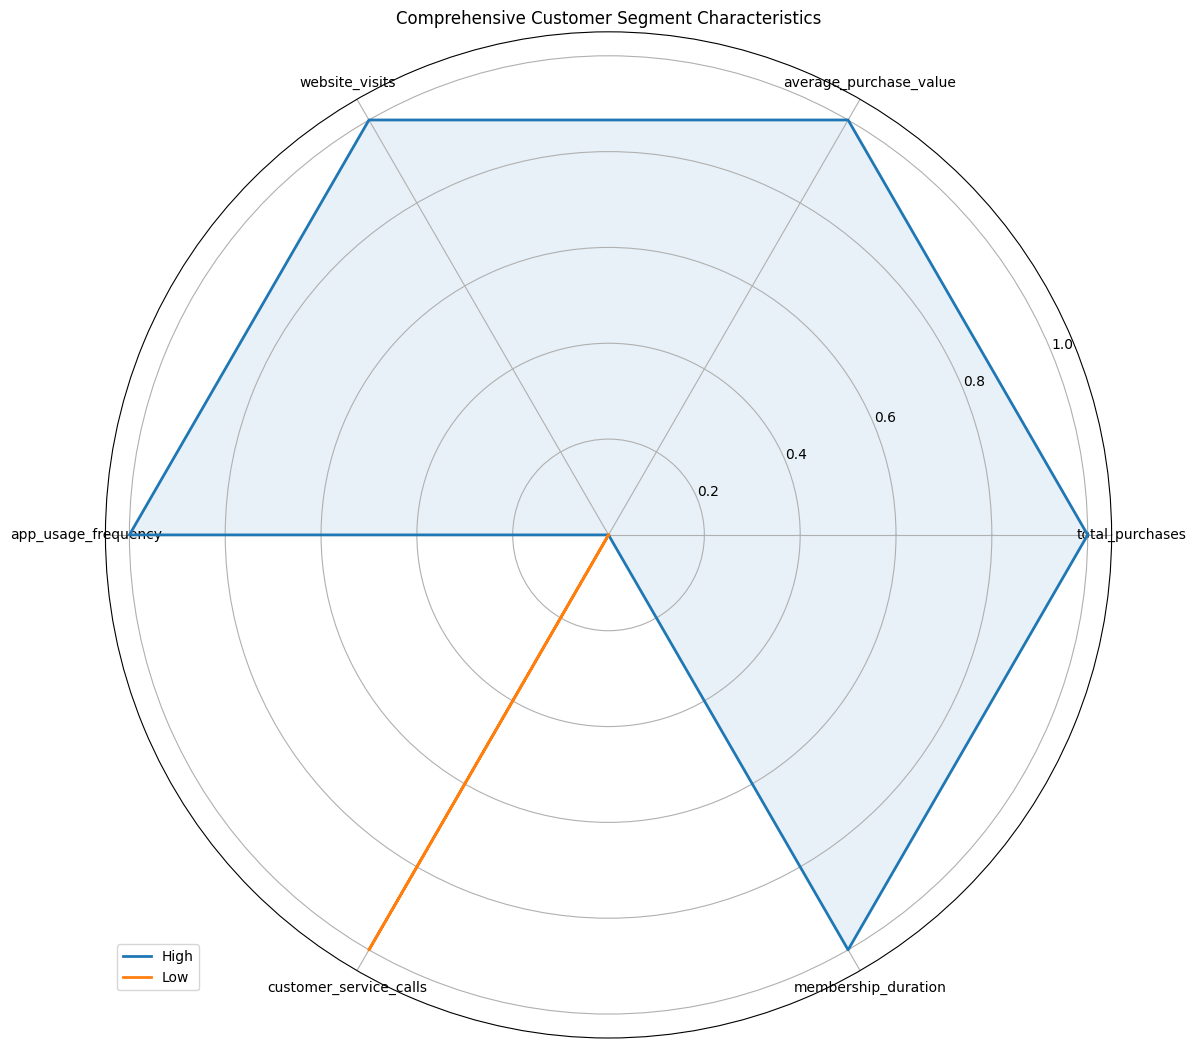

In [78]:
# Radar Chart with More Dimensions
from math import pi
    
    # More comprehensive radar chart features
radar_features = [
        'total_purchases', 'average_purchase_value', 
        'website_visits', 'app_usage_frequency', 
        'customer_service_calls', 'membership_duration'
    ]
    
    # Normalize the data
radar_df = df.groupby('loyalty_level')[radar_features].mean()
radar_df_norm = (radar_df - radar_df.min()) / (radar_df.max() - radar_df.min())
    
    # Number of variables
categories = list(radar_df_norm.columns)
N = len(categories)
    
    # Radar Chart
plt.figure(figsize=(12, 12))
    
    # Angle of each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
    
    # Plot
plt.subplot(polar=True)
    
for loyalty_level in radar_df_norm.index:
        values = radar_df_norm.loc[loyalty_level].tolist()
        values += values[:1]
        plt.polar(angles, values, linewidth=2, linestyle='solid', label=loyalty_level)
        plt.fill(angles, values, alpha=0.1)
    
plt.title('Comprehensive Customer Segment Characteristics')
plt.xticks(angles[:-1], categories)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
plt.tight_layout()

In [79]:
import pandas as pd
import plotly.express as px


# Create age groups
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Define your age bins
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group by loyalty level and age group
segment_data = df.groupby(['loyalty_level', 'age_group']).size().reset_index(name='count')

# Plotly Tree Map
fig = px.treemap(
    segment_data, 
    path=['loyalty_level', 'age_group'], 
    values='count',
    title='Customer Segments by Loyalty Level and Age Group'
)

fig.show()


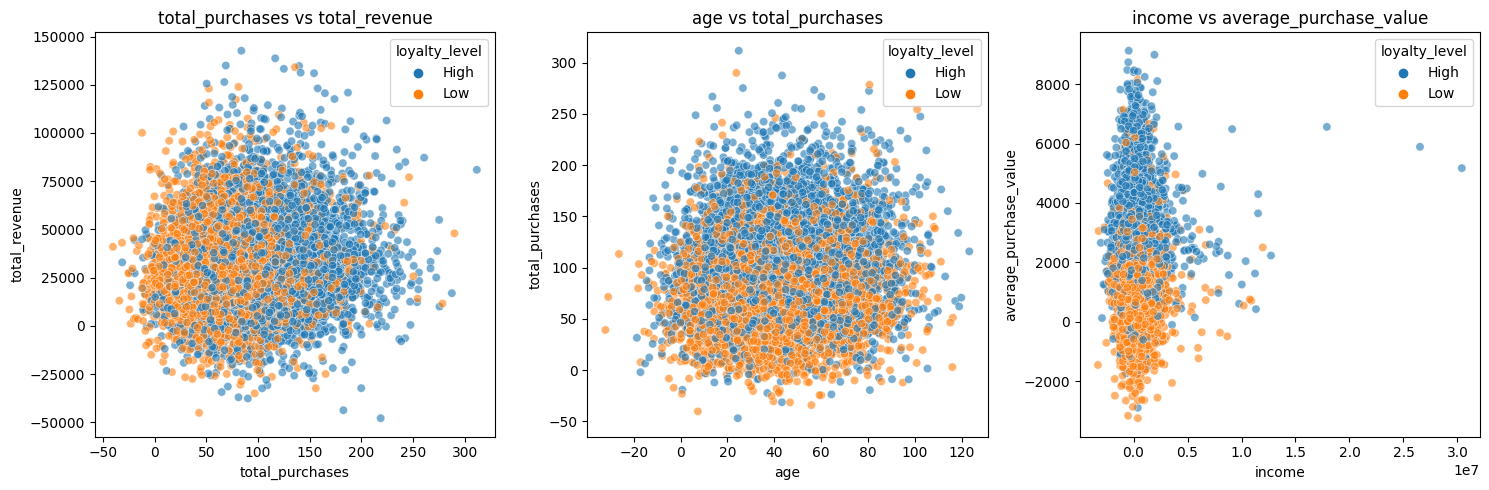

In [80]:

key_scatter_pairs = [
    ('total_purchases', 'total_revenue'),
    ('age', 'total_purchases'),
    ('income', 'average_purchase_value')
]

    
    
plt.figure(figsize=(15, 5))
for i, (x, y) in enumerate(key_scatter_pairs, 1):
        plt.subplot(1, 3, i)
        sns.scatterplot(data=df, x=x, y=y, hue='loyalty_level', alpha=0.6)
        plt.title(f'{x} vs {y}')
    
plt.tight_layout()

In [81]:
def preprocess_customer_data(df):
    # Create a copy of the dataframe
    data = df.copy()
    
    # Store loyalty_level separately before preprocessing
    target = None
    if 'loyalty_level' in data.columns:
        target = data['loyalty_level'].map({'Low': 0, 'High': 1})
        data = data.drop('loyalty_level', axis=1)
    
    # Separate numerical and categorical columns
    numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns
    
    # Handle numerical features
    for col in numerical_cols:
        # Handle outliers using IQR method
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[col] = data[col].clip(lower_bound, upper_bound)
        
        # Log transform highly skewed numerical features
        if data[col].skew() > 1:
            data[col] = np.log1p(data[col])
        
        # Scale numerical features
        data[col] = (data[col] - data[col].mean()) / data[col].std()
    
    # Handle categorical features
    for col in categorical_cols:
        dummies = pd.get_dummies(data[col], prefix=col)
        data = pd.concat([data, dummies], axis=1)
        data.drop(col, axis=1, inplace=True)
    
    # Create interaction features
    data['purchase_value_ratio'] = data['total_purchases'] * data['average_purchase_value']
    data['engagement_score'] = data['website_visits'] * data['app_usage_frequency']
    data['revenue_per_visit'] = data['total_revenue'] / (data['website_visits'] + 1)
    
    # Drop highly correlated features (threshold = 0.95)
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    data.drop(to_drop, axis=1, inplace=True)
    
    # Handle any remaining missing values
    data.fillna(data.mean(), inplace=True)
    
    if target is not None:
        data['loyalty_level'] = target
    
    return data

# Usage:
processed_df = preprocess_customer_data(df)


In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from scipy import stats
from scipy.stats import boxcox
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)

def auto_eda(df, target_column=None, flag=False, datetime_col=None):
    """
    Perform automated exploratory data analysis on a given DataFrame.

    Args:
        df (pd.DataFrame): Input DataFrame
        target_column (str, optional): Name of the target column. Defaults to None.
        flag (bool, optional): If True, process as time series data. Defaults to False.
        datetime_col (str, optional): Name of the datetime column. Defaults to None.

    Returns:
        pd.DataFrame or tuple: Cleaned DataFrame and fairness DataFrame if applicable
    """
    # 1. Remove duplicates
    df = df.drop_duplicates().reset_index(drop=True)

    # 2. Drop constant columns
    df = df.loc[:, (df != df.iloc[0]).any()].reset_index(drop=True)

    # 3. Extract and Remove date columns
    final_datetime_df = pd.DataFrame()
    fairness_df = pd.DataFrame()

    if flag:
        if datetime_col is None or datetime_col not in df.columns:
            return pd.DataFrame()

        try:
            date_time_data_frame = pd.to_datetime(df[datetime_col], errors='coerce').to_frame()
        except Exception as e:
            print(f"Error converting to datetime: {e}")
            return pd.DataFrame()

        date_time_data_frame[datetime_col] = date_time_data_frame[datetime_col].fillna(method='ffill').interpolate(method='linear')

        date_time_data_frame[f'{datetime_col}_day'] = date_time_data_frame[datetime_col].dt.day
        date_time_data_frame[f'{datetime_col}_month'] = date_time_data_frame[datetime_col].dt.month
        date_time_data_frame[f'{datetime_col}_year'] = date_time_data_frame[datetime_col].dt.year

        date_time_data_frame[f'{datetime_col}_datetime'] = date_time_data_frame.apply(
            lambda row: f"{int(row[f'{datetime_col}_day']):02d}-{int(row[f'{datetime_col}_month']):02d}-{int(row[f'{datetime_col}_year'])}",
            axis=1
        )

        final_datetime_df = date_time_data_frame[[f'{datetime_col}_datetime']].reset_index(drop=True)

    final_datetime_df_2 = pd.DataFrame()
    date_cols = df.select_dtypes(include=['datetime64[ns]', 'datetime']).columns

    if len(date_cols) > 0:
        final_datetime_df_2 = df[date_cols].copy()
        for data_col in date_cols:
            final_datetime_df_2[data_col] = final_datetime_df_2[data_col].fillna(method='ffill').fillna(method='bfill').interpolate(method='linear')
            final_datetime_df_2[data_col] = pd.to_datetime(final_datetime_df_2[data_col], errors='coerce')

            first_valid_date = final_datetime_df_2[data_col].min()
            final_datetime_df_2[data_col].fillna(first_valid_date, inplace=True)

            final_datetime_df_2[f'{data_col}_day'] = final_datetime_df_2[data_col].dt.day
            final_datetime_df_2[f'{data_col}_month'] = final_datetime_df_2[data_col].dt.month
            final_datetime_df_2[f'{data_col}_year'] = final_datetime_df_2[data_col].dt.year

        final_datetime_df_2 = final_datetime_df_2.astype(object)

    # 4. Remove outliers (using IQR method for numerical columns)
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        Q1 = df[col].quantile(0.05)
        Q3 = df[col].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)].reset_index(drop=True)

    # 5. Handle missing numerical values
    numerical_imputer = SimpleImputer(strategy='mean')
    df[numeric_columns] = numerical_imputer.fit_transform(df[numeric_columns])
    # Update numeric_columns after dropping correlated features
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    # Handle target column
    # Handle target column
    if target_column is not None and target_column in df.columns:
        # Drop rows with missing values in the target column and reset the index
        df = df.dropna(subset=[target_column]).reset_index(drop=True)

        # Map the target values to 1 and 0
        target_mapping = {
            'High': 1,
            'Low': 0
        }

        # Apply the mapping to create a new target column
        df[target_column] = df[target_column].map(target_mapping)

        # Check for any NaN values after mapping
        if df[target_column].isnull().any():
            print("Warning: Some target values were not mapped. Check the unique values in the target column.")
            print(df[target_column].unique())

        # Store the encoded target data in a separate variable
        target_data = df[target_column]

        # Drop the target column from the main DataFrame
        df = df.drop(columns=[target_column])
    else:
        # If the target column is not categorical, set target_data to None
        target_data = None

    # Select numeric columns from the DataFrame for further processing
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    # 6. Remove highly correlated features
    correlation_matrix = df[numeric_columns].corr().abs()
    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
    df = df.drop(columns=to_drop).reset_index(drop=True)

    # 7. Handle skewness using Box-Cox Transformation
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    
    for col in numeric_columns:
        if col in df.columns:
            skewness = stats.skew(df[col])
            if skewness > 0.5:
                if (df[col] <= 0).any():
                    df[col] = df[col] - df[col].min() + 1
                df[col], _ = boxcox(df[col])

    # 8. Data normalization using MinMaxScaler
    scaler = MinMaxScaler()
    normalized_df = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

    # 9. Handle missing categorical values
    if not final_datetime_df_2.empty and not flag:
        df = df.join(final_datetime_df_2, how='inner', lsuffix='_left', rsuffix='_right').reset_index(drop=True)

    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    # 10. Dropping categorical columns with unique values greater than 10
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].nunique() > 10:
            df.drop(columns=col, inplace=True)
            
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    
    # Check if there are any categorical columns to process
    if len(categorical_columns) > 0:
        # Initialize a SimpleImputer to fill missing values with the most frequent value
        categorical_imputer = SimpleImputer(strategy='most_frequent')
        # Apply the imputer to the categorical columns
        df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])
        # Create a DataFrame for the imputed categorical columns
        categorical_df = df[categorical_columns].reset_index(drop=True)
    
        # Initialize a list to hold encoded DataFrames
        encoded_dfs = []
        # Loop through each categorical column for encoding
        for col in categorical_columns:
            # Check if the column has 2 or fewer unique values
            if df[col].nunique() <= 2:
                # Initialize a LabelEncoder for binary encoding
                label_encoder = LabelEncoder()
                # Fit and transform the column, replacing it with encoded values
                df[col] = label_encoder.fit_transform(df[col])
                # Append the encoded column to the list
                encoded_dfs.append(df[[col]])
            else:
                # For columns with more than 2 unique values, use one-hot encoding
                one_hot_encoded = pd.get_dummies(df[col], prefix=col, drop_first=True).astype(int)
                # Append the one-hot encoded DataFrame to the list
                encoded_dfs.append(one_hot_encoded)
    
        # Concatenate all encoded DataFrames into a single DataFrame
        encoded_df = pd.concat(encoded_dfs, axis=1).reset_index(drop=True)
    
        # Join the normalized DataFrame with the encoded DataFrame
        joined_df = pd.concat([normalized_df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
    
        # If a target column is specified, create a fairness DataFrame
        if target_column is not None:
            fairness_df = pd.concat([normalized_df, categorical_df], axis=1).reset_index(drop=True)
        else:
            # If no target column is specified, set joined_df to normalized_df
            joined_df = normalized_df

    # If a target column is specified, ensure fairness_df is set to normalized_df
    if target_column is not None:
        fairness_df = normalized_df



    if target_data is not None:
        joined_df[target_column] = target_data
    joined_df.to_csv("cleaned_churn_data.csv", index=False)

    # 12. Concatenate cleaned_df with final_datetime_df if flag is True
    # Check if the flag is set for time series processing and if the final_datetime_df is not empty
    if flag and not final_datetime_df.empty:
        # Join the joined DataFrame with the final datetime DataFrame using an inner join
        timeseries_df = joined_df.join(final_datetime_df, how='inner').reset_index(drop=True)
        # Return the resulting time series DataFrame
        return timeseries_df
    else:
        # If a target column is specified
        if target_column is not None:
            # Return the joined DataFrame and the fairness DataFrame, both with reset indices
            return joined_df.reset_index(drop=True), fairness_df.reset_index(drop=True)
        else:
            # If no target column is specified, return only the joined DataFrame with reset index
            return joined_df.reset_index(drop=True)


def data_read(df, target_column=None, flag=False, datetime_col=None):
    if flag:
        timeseries_df = auto_eda(df, target_column, flag, datetime_col=datetime_col)
        return timeseries_df
    else:
        result = auto_eda(df, target_column, flag, datetime_col=datetime_col)
        if isinstance(result, tuple):
            joined_df, fairness_df = result
            joined_df.to_csv("cleaned_data.csv", index=False)
            return joined_df, fairness_df
        else:
            joined_df = result
            
            return joined_df

In [83]:
# run the file
cleaned_data,fairness_data = data_read(df, target_column="loyalty_level")
cleaned_data.head(10)

age    income  education_years  total_purchases  \
0  0.633329  0.505324         0.595317         0.213204   
1  0.579356  0.560952         0.601420         0.511477   
2  0.629777  0.453676         0.550215         0.593967   
3  0.372565  0.665092         0.535431         0.302656   
4  0.565739  0.621282         0.682104         0.396408   
5  0.458417  0.565999         0.442303         0.276545   
6  0.327507  0.645560         0.609661         0.092419   
7  0.379569  0.658353         0.576960         0.416777   
8  0.282763  0.630438         0.690816         0.209492   
9  0.397683  0.538748         0.448972         0.403447   

   average_purchase_value  days_since_last_purchase  customer_service_calls  \
0                0.695982                  0.570451                0.372318   
1                0.598344                  0.632672                0.577572   
2                0.355505                  0.435908                0.324874   
3                0.308629                  0.618441                0.111879   
4                0.486683                  0.536437                0.449601   
5                0.463162                  0.544580                0.626291   
6                0.816236                  0.610583                0.474889   
7                0.555258                  0.540492                0.438730   
8                0.421486                  0.610808                0.343357   
9                0.331542                  0.536337                0.378261   

   website_visits  app_usage_frequency  total_revenue  ...  engagement_score  \
0        0.410921             0.450760       0.838368  ...          0.554826   
1        0.346926             0.534476       0.600404  ...          0.496645   
2        0.550893             0.608651       0.524688  ...          0.494133   
3        0.695161             0.365709       0.548683  ...          0.440488   
4        0.687554             0.419329       0.671070  ...          0.692139   
5        0.564637             0.360640       0.601808  ...          0.332249   
6        0.541418             0.639063       0.831525  ...          0.484224   
7        0.836173             0.513298       0.646511  ...          0.535779   
8        0.260697             0.708713       0.601345  ...          0.549593   
9        0.500602             0.522644       0.717511  ...          0.489078   

   loyalty_score  gender  age_group_19-25  age_group_26-35  age_group_36-45  \
0       0.516146       0                0                0                0   
1       0.603920       1                0                0                0   
2       0.441574       0                0                0                0   
3       0.270587       1                0                1                0   
4       0.440661       1                0                0                0   
5       0.387512       0                0                0                1   
6       0.569376       0                1                0                0   
7       0.464268       1                0                1                0   
8       0.340749       0                0                0                0   
9       0.369217       0                0                1                0   

   age_group_46-55  age_group_56-65  age_group_66+  loyalty_level  
0                0                0              1              1  
1                0                1              0              0  
2                0                0              1              1  
3                0                0              0              0  
4                0                1              0              1  
5                0                0              0              1  
6                0                0              0              0  
7                0                0              0              1  
8                0                0              0              0  
9                0                0              0       

In [84]:
cleaned_data.head()

age    income  education_years  total_purchases  \
0  0.633329  0.505324         0.595317         0.213204   
1  0.579356  0.560952         0.601420         0.511477   
2  0.629777  0.453676         0.550215         0.593967   
3  0.372565  0.665092         0.535431         0.302656   
4  0.565739  0.621282         0.682104         0.396408   

   average_purchase_value  days_since_last_purchase  customer_service_calls  \
0                0.695982                  0.570451                0.372318   
1                0.598344                  0.632672                0.577572   
2                0.355505                  0.435908                0.324874   
3                0.308629                  0.618441                0.111879   
4                0.486683                  0.536437                0.449601   

   website_visits  app_usage_frequency  total_revenue  ...  engagement_score  \
0        0.410921             0.450760       0.838368  ...          0.554826   
1        0.346926             0.534476       0.600404  ...          0.496645   
2        0.550893             0.608651       0.524688  ...          0.494133   
3        0.695161             0.365709       0.548683  ...          0.440488   
4        0.687554             0.419329       0.671070  ...          0.692139   

   loyalty_score  gender  age_group_19-25  age_group_26-35  age_group_36-45  \
0       0.516146       0                0                0                0   
1       0.603920       1                0                0                0   
2       0.441574       0                0                0                0   
3       0.270587       1                0                1                0   
4       0.440661       1                0                0                0   

   age_group_46-55  age_group_56-65  age_group_66+  loyalty_level  
0                0                0              1              1  
1                0                1              0              0  
2                0                0              1              1  
3                0                0              0              0  
4                0                1              0              1  

[5 rows x 24 columns]

In [85]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import plotly.express as px

# Prepare data for PCA
features_for_clustering = [
    'age', 
    'income', 
    'total_purchases', 
    'average_purchase_value', 
    'days_since_last_purchase', 
    'customer_service_calls', 
    'website_visits', 
    'app_usage_frequency', 
    'membership_duration'
]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cleaned_data[features_for_clustering])

# PCA Visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Create PCA DataFrame
pca_df = pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2'])
pca_df['loyalty_level'] = df['loyalty_level']

# Plotly Interactive PCA Plot
fig = px.scatter(
    pca_df, 
    x='PCA1', 
    y='PCA2', 
    color='loyalty_level', 
    title='PCA Visualization of Customer Characteristics',
    labels={'PCA1': 'First Principal Component', 
            'PCA2': 'Second Principal Component'}
)

# Show the plot
fig.show()


In [86]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = cleaned_data.drop('loyalty_level', axis=1)
y = cleaned_data['loyalty_level']

# Perform train-test split with 80-20 ratio and stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Print shapes to verify the split
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (3710, 23)
Testing set shape: (928, 23)


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    confusion_matrix, 
    roc_curve, 
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score, 
    f1_score,
    classification_report
)
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [88]:
class ModelEvaluator:
    def __init__(self, X, y, test_size=0.2, random_state=42):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )
        self.models = {}
        self.results = {}
        self.predictions = {}
        self.probabilities = {}
    
    def setup_models(self):
        # Initialize models with default parameters
        self.models['Random Forest'] = RandomForestClassifier(random_state=42)
        self.models['Logistic Regression'] = LogisticRegression(random_state=42)
        self.models['Decision Tree'] = DecisionTreeClassifier(random_state=42)
        self.models['Bagging'] = BaggingClassifier(random_state=42)
        self.models['XGBoost'] = xgb.XGBClassifier(random_state=42)

    def plot_confusion_matrix(self, y_true, y_pred, title):
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {title}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
    
    def plot_roc_curves(self):
        plt.figure(figsize=(10, 8))
        
        for name in self.probabilities.keys():
            fpr, tpr, _ = roc_curve(self.y_test, self.probabilities[name])
            roc_auc = roc_auc_score(self.y_test, self.probabilities[name])
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')
        
        plt.plot([0, 1], [0, 1], 'k--', label='Random')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curves Comparison')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

    def create_comparison_table(self):
        comparison_data = []
        
        for name in self.results.keys():
            model_metrics = {
                'Model': name,
                'Accuracy': self.results[name]['Accuracy'],
                'ROC AUC': self.results[name]['ROC AUC'],
                'Precision': self.results[name]['Precision'],
                'Recall': self.results[name]['Recall'],
                'F1 Score': self.results[name]['F1 Score']
            }
            comparison_data.append(model_metrics)
        
        comparison_df = pd.DataFrame(comparison_data)
        comparison_df.set_index('Model', inplace=True)
        
        # Add ranking
        for column in comparison_df.columns:
            comparison_df[f'{column} Rank'] = comparison_df[column].rank(ascending=False)
        
        # Calculate average rank
        rank_columns = [col for col in comparison_df.columns if 'Rank' in col]
        comparison_df['Average Rank'] = comparison_df[rank_columns].mean(axis=1)
        
        # Sort by average rank
        comparison_df.sort_values('Average Rank', inplace=True)
        
        # Format metrics to 4 decimal places
        metric_columns = ['Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1 Score']
        comparison_df[metric_columns] = comparison_df[metric_columns].round(4)
        
        return comparison_df

    def train_and_evaluate(self):
        for name, model in self.models.items():
            print(f"\nTraining {name}...")
            
            # Train the model with default parameters
            model.fit(self.X_train, self.y_train)
            
            # Make predictions
            y_pred = model.predict(self.X_test)
            y_pred_proba = model.predict_proba(self.X_test)[:, 1]
            
            self.predictions[name] = y_pred
            self.probabilities[name] = y_pred_proba
            
            # Calculate metrics
            self.results[name] = {
                'Accuracy': accuracy_score(self.y_test, y_pred),
                'ROC AUC': roc_auc_score(self.y_test, y_pred),
                'Precision': precision_score(self.y_test, y_pred, pos_label=1),
                'Recall': recall_score(self.y_test, y_pred, pos_label=1),
                'F1 Score': f1_score(self.y_test, y_pred, pos_label=1)
            }
            
            print("\nTest Set Metrics:")
            print(classification_report(self.y_test, y_pred))
            
            self.plot_confusion_matrix(self.y_test, y_pred, name)
        
        self.plot_roc_curves()

    def display_results(self):
        
        
        
        # Create and display comparison table
        comparison_df = self.create_comparison_table()
        
        print("\nModel Performance Comparison:")
        print(comparison_df)



Training Random Forest...

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       404
           1       0.90      0.93      0.91       524

    accuracy                           0.90       928
   macro avg       0.90      0.90      0.90       928
weighted avg       0.90      0.90      0.90       928



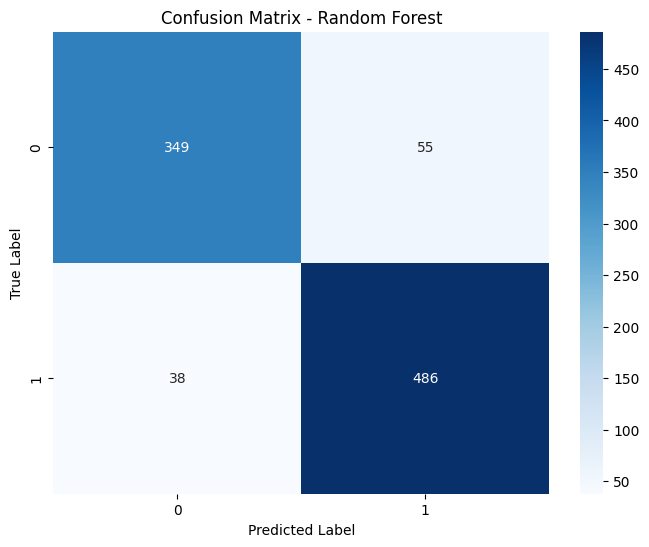


Training Logistic Regression...

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       404
           1       0.87      0.90      0.89       524

    accuracy                           0.87       928
   macro avg       0.87      0.87      0.87       928
weighted avg       0.87      0.87      0.87       928



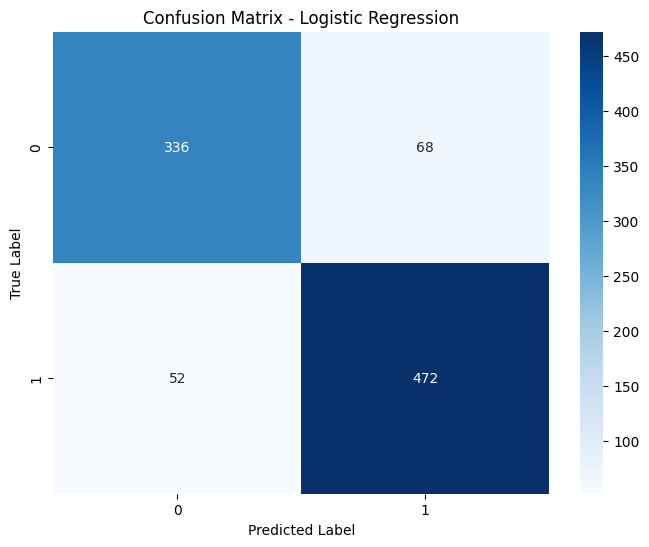


Training Decision Tree...

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       404
           1       0.85      0.83      0.84       524

    accuracy                           0.82       928
   macro avg       0.82      0.82      0.82       928
weighted avg       0.82      0.82      0.82       928



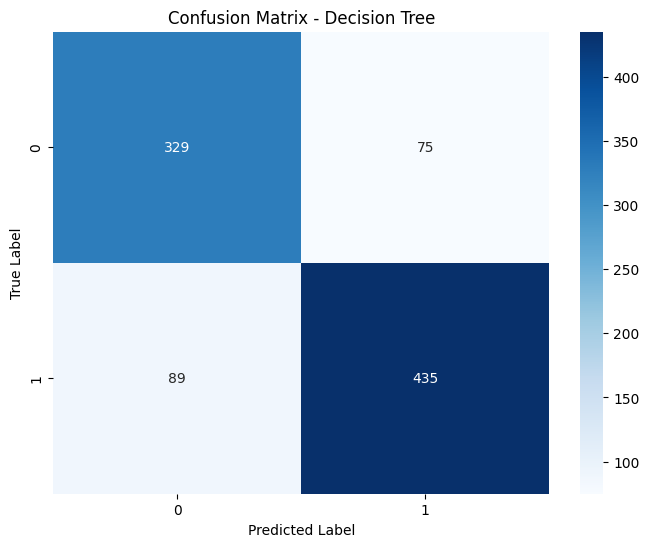


Training Bagging...

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       404
           1       0.90      0.90      0.90       524

    accuracy                           0.89       928
   macro avg       0.88      0.88      0.88       928
weighted avg       0.89      0.89      0.89       928



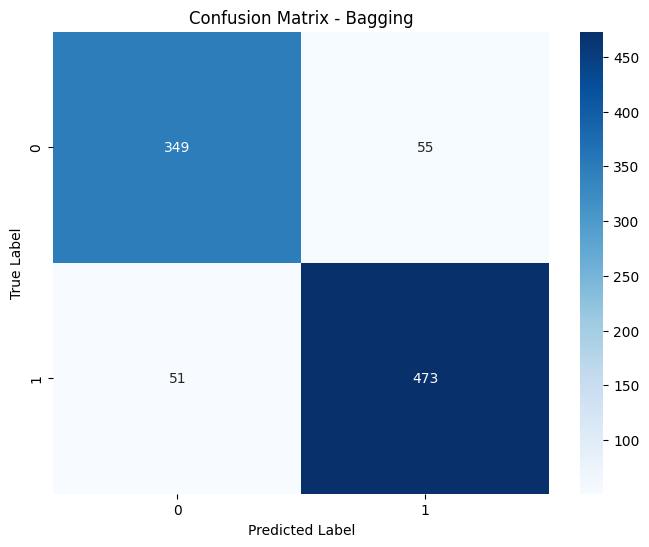


Training XGBoost...

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       404
           1       0.89      0.92      0.91       524

    accuracy                           0.89       928
   macro avg       0.89      0.89      0.89       928
weighted avg       0.89      0.89      0.89       928



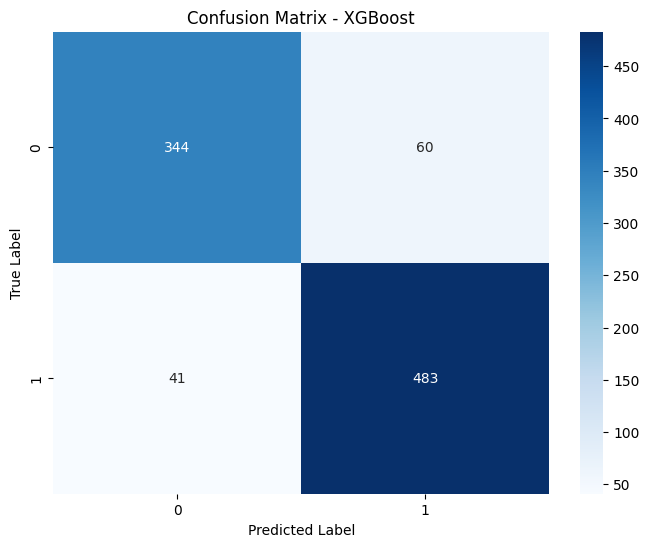

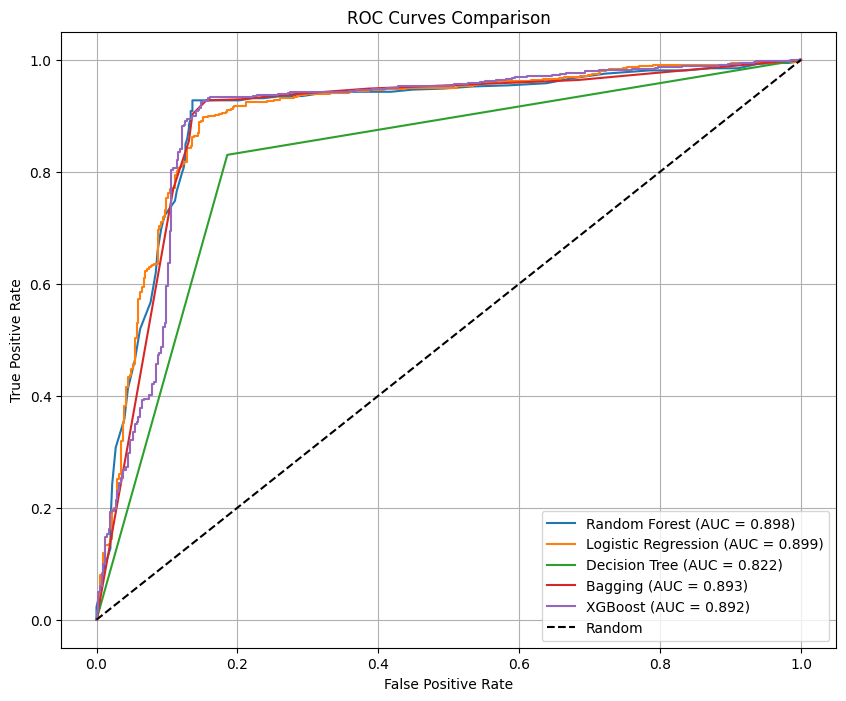


Model Performance Comparison:
                     Accuracy  ROC AUC  Precision  Recall  F1 Score  \
Model                                                                 
Random Forest          0.8998   0.8957     0.8983  0.9275    0.9127   
XGBoost                0.8912   0.8866     0.8895  0.9218    0.9053   
Bagging                0.8858   0.8833     0.8958  0.9027    0.8992   
Logistic Regression    0.8707   0.8662     0.8741  0.9008    0.8872   
Decision Tree          0.8233   0.8223     0.8529  0.8302    0.8414   

                     Accuracy Rank  ROC AUC Rank  Precision Rank  Recall Rank  \
Model                                                                           
Random Forest                  1.0           1.0             1.0          1.0   
XGBoost                        2.0           2.0             3.0          2.0   
Bagging                        3.0           3.0             2.0          3.0   
Logistic Regression            4.0           4.0             4.0  

In [89]:
# Import required metrics if not already imported
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV

# Initialize the model evaluator with your data
evaluator = ModelEvaluator(X, y)

# Setup the models
evaluator.setup_models()

# Train and evaluate models
evaluator.train_and_evaluate()

# Display results
evaluator.display_results()
